# Brownian Processes

- We will explore some of the interesting properties of brownian motion using monte carlo methods.
- This notebook is inspired by a video from youtuber Almost Sure: https://www.youtube.com/watch?v=YTQKbgxbtiw&t=1513s. Thanks for the inspiring video!

## Brownian Motion
We will simulate a brownian motion using and verify some of its properties.

A standard Brownian motion $\{W_t\}_{t \ge 0}$ can be simulated on a time grid 
$0 = t_0 < t_1 < \cdots < t_N = T$ using the fact that Brownian increments 
are independent and normally distributed. Specifically
$
W_{t_{k+1}} - W_{t_k} \sim \mathcal{N}(0,\, t_{k+1}-t_k).
$

Assuming $W_{0} = 0$, $W_{t} \sim \mathcal{N}(0,\,t)$

Another interesting property is the scaling of brownian motion. To scale the brownian motion to the unit time, we just need to divide the values of the brownian motion by $\sqrt{t}$.

$W_t \overset{d}{=} \sqrt{t}\, W_1$

(5, 501)


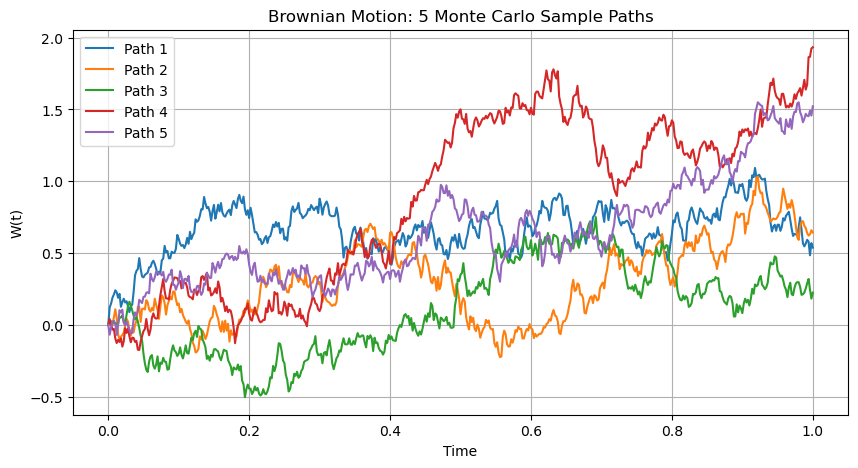

In [53]:
import numpy as np
import matplotlib.pyplot as plt
M = 5
def simulate_brownian(M=5, N=500, T=1.0, seed=None):
    """
    Simulate M sample paths of standard Brownian motion on [0,T]
    with N time steps (so N+1 grid points).
    
    Returns
    -------
    t : 1D ndarray, shape (N+1,)
        Time grid.
    W : 2D ndarray, shape (M, N+1)
        Simulated Brownian paths. Each row is one path.
    """
    if seed is not None:
        np.random.seed(seed)
    dt = T / N
    t = np.linspace(0.0, T, N + 1)
    # increments: shape (M, N)
    dW = np.sqrt(dt) * np.random.randn(M, N)
    # accumulate to form W; include initial zero column
    W = np.zeros((M, N + 1))
    W[:, 1:] = np.cumsum(dW, axis=1)
    return t, W

t,W = simulate_brownian(seed = 101)

print(W.shape)

# Plot
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, W[i], label=f'Path {i+1}')

plt.title("Brownian Motion: 5 Monte Carlo Sample Paths")
plt.xlabel("Time")
plt.ylabel("W(t)")
plt.grid(True)
plt.legend()
plt.show()

## Reflection Principle of Brownian Motion.

The reflection principle is a key result in the theory of Brownian motion that allows us to compute probabilities involving the maximum of Brownian paths.

Let $\{W_t\}_{t \ge 0}$ be a standard brownian motion.
For a level `a` > 0, define the first crossing time: $\tau_{a}  = \inf ( t \ge 0 : W_{t} = a)$.
Then, the reflected process $\widetilde{W}_t$ is as follows: <br>
$
\widetilde{W}_t =
\begin{cases}
W_t, & t \le \tau_a, \\
2a - W_t, & t > \tau_a
\end{cases}
$

The idea is that once the Brownian path hits the level `a`, all increments after the hitting time are reflected across the horizontal line `y = a`.



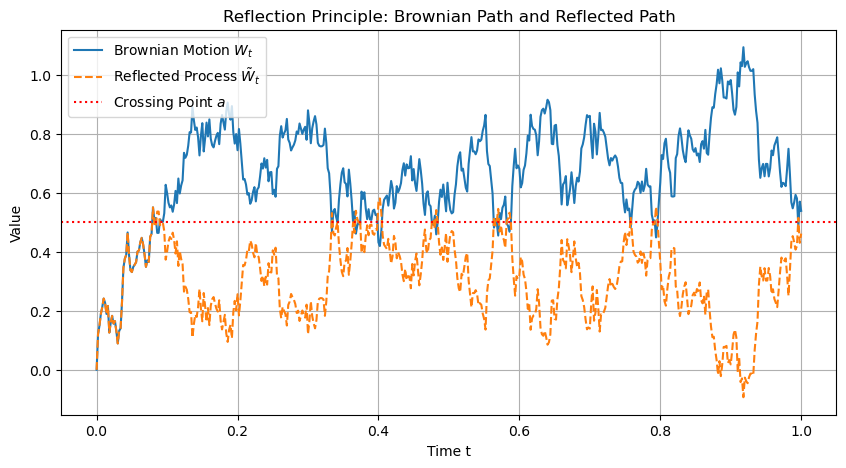

In [54]:
def reflected_brownian_motion(W, t, a=0.5):

    # Stopping time
    tau_index = np.argmax(W >= a)  
    if W[tau_index] < a:
        
        return W

    W_ref = W.copy()
    
    # reflect after hitting time. 
    # Reflected process follows 2a - wt after time tau 
    W_ref[tau_index+1:] = 2*a - W[tau_index+1:]
    return W_ref

#Upper Barrier
a = 0.5

#We only want 1 sample path


# Generate reflection
W_ref = reflected_brownian_motion(W[0,:], t, a)


# Plot
plt.figure(figsize=(10,5))
plt.plot(t, W[0,:], label='Brownian Motion $W_t$')
plt.plot(t, W_ref, label='Reflected Process $\~W_t$', linestyle='--')
plt.axhline(a, color='red', linestyle=':', label='Crossing Point $a$')

plt.xlabel('Time t')
plt.ylabel('Value')
plt.title('Reflection Principle: Brownian Path and Reflected Path')
plt.legend()
plt.grid(True)
plt.show()


## Brownian Bridge

A Brownian bridge $B_t$ is a continuous-time stochastic process that describes Brownian motion (a random walk) conditioned to return to a specific point at a fixed time, usually to 0. Using the brownian motion generated above, we can convert it to a brownian bridge using the equation described below:

$B_t = W_t - (t/T) \cdot W_T \quad \text{for } 0 \leq t \leq T$

If we scale to unit time, the equation will be as followed:
$B_t = W_t - t \cdot W_1 \quad \text{for } 0 \leq t \leq 1$

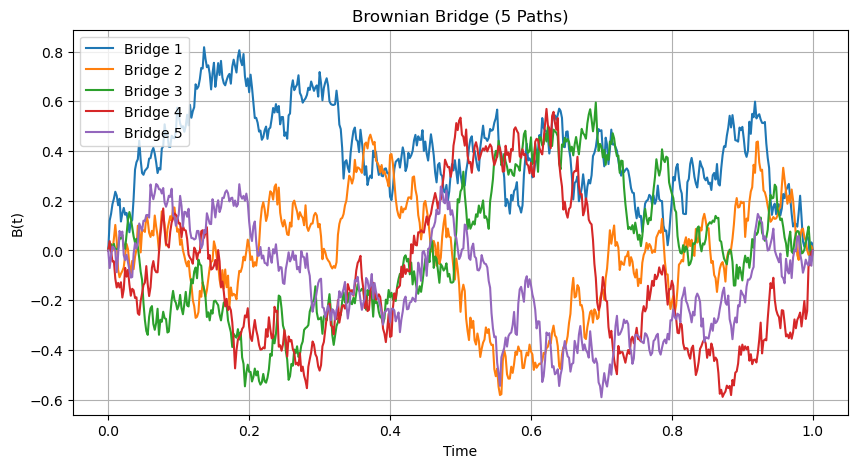

In [55]:
def brownian_bridge_from_W(W, T):
    """
    Convert Brownian motion paths W into Brownian bridge paths B
    using B(t) = W(t) - (t/T) * W(T).
    
    Parameters
    ----------
    W : 2D ndarray, shape (M, N+1)
        Brownian motion sample paths, rows are paths.
    T : float
        Time horizon corresponding to W(T).
    
    Returns
    -------
    B : 2D ndarray, shape (M, N+1)
        Brownian bridge sample paths (same shape as W).
    """
    M, Nplus1 = W.shape
    # build time fraction vector t/T (shape (N+1,))
    t_over_T = np.linspace(0, 1, Nplus1)
    # subtract line connecting (0,0) to (T, W(T))
    B = W - (W[:, -1][:, None] * t_over_T[None, :])

    return B

B = brownian_bridge_from_W(W, 1)

# --- Plot ---
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, B[i], label=f'Bridge {i+1}')

plt.title("Brownian Bridge (5 Paths)")
plt.xlabel("Time")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()
plt.show()

### Maximum of Brownian Bridges ($\max B_t$)
The maximum of a brownian bridge follows a Reyleigh distribution. This can be shown using the reflection principle.
In short, 

$
\mathbb{P}( \max_{0 \le t \le 1} W_t > x, W_1 = 0) = \frac{\mathbb{P}( W_1 = 2x )}{\mathbb{P}( \tilde W_1 = 0 )} = e^{-2x^2}
$

Hence, $ \mathbb{P}\!\left( \max_{0 \le t \le 1} W_t \le x \,\middle|\, W_1 = 0 \right) = 1- e^{-2x^2}$ ~ $R(\sigma = 0.5)$


We can verify this using monte carlo method.

In [56]:
t,W = simulate_brownian(M=1000000, N=500, T=1.0, seed=None)
B = brownian_bridge_from_W(W, 1)

In [57]:
print(B.shape); print(W.shape)

(1000000, 501)
(1000000, 501)


In [58]:
max_B = np.max(B, axis=1)

In [59]:
x = np.linspace(0, 4, 500)

# Rayleigh PDF
sigma = 0.5
rayleigh_pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))

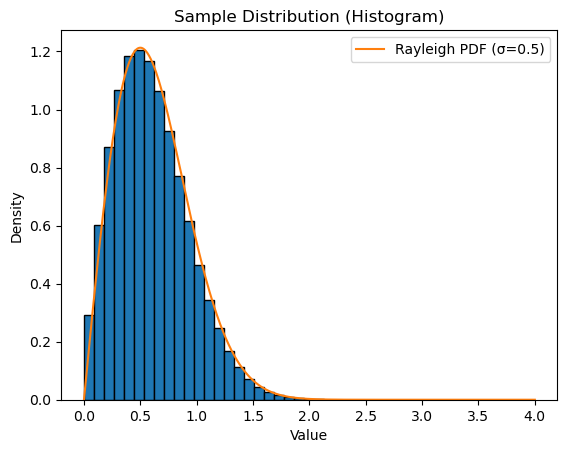

In [60]:
plt.hist(max_B, bins=30, density=True, edgecolor='black')
plt.plot(x, rayleigh_pdf, label=f"Rayleigh PDF (σ={sigma})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Sample Distribution (Histogram)")
plt.legend()
plt.show()

### Maximum of the absolute of Brownian Bridges ($\max |B_t|$)

The maximum of the absolute of the brownian bridge follows the kolmogorov distribution. Similar to the example above for the maximum of the brownian bridge, this can be shown using the reflection principle. Firstly, let U and L be the event that the upper and lower barrier are exceeded x and -x respectively. The probability of the events are just the maximum of the brownian bridge exceeding x. Both probabilities are the same due to the symmetrical barriers.

$\mathbb{P}(U) = \mathbb{P}(L) = \mathbb{P}(\max B_t > x) =e^{-2x^2}$

For n altenating barrier hits of U then L at the level x and -x respectively,

$
\mathbb{P}\!\left( ULUL... \right)
=
\frac{\mathbb{P}( W_1 = 2nx )}{\mathbb{P}( \tilde W_1 = 0 )}
= e^{-2n^2x^2}
$

Hence, the absolute maximum of a brownian bridge will be the event that either the U or L happens and when written in mathematical notation, 

$ \mathbb{P}(\max B_t > x) = \mathbb{P}(\text{U or L})$

Using the inclusion-exclusion principle,

$\mathbb{P}(U \cup L) = \mathbb{P}(U) + \mathbb{P}(L) - \mathbb{P}(U \cap L)$

However, when both the lower and upper barriers are touch, either the lower is touched first followed by the upper or vice versa.
$\mathbb{P}(U \cap L) = \mathbb{P}(UL \cup LU) = \mathbb{P}(UL) + \mathbb{P}(LU) - \mathbb{P}(UL \cap LU)$ <br>

Continuing the pattern, when UL and LU are touched in this order, either the sequence is ULU or LUL.
$\mathbb{P}(UL \cap LU) = \mathbb{P}(ULU \cup LUL) = \mathbb{P}(ULU) + \mathbb{P}(LUL) - \mathbb{P}(ULUL \cap LULU)$

By writing it as in infinite sum,

$\mathbb{P}(U \cup L) = \sum_{n=1}^{\infty}(-1)^{n-1} (\mathbb{P}(LU...) + \mathbb{P}(UL...) = 2\sum_{n=1}^{\infty}(-1)^{n-1} e^{-2n^2x^2}$

Putting all the equations together,
$\mathbb{P}\left(\max_{t \in [0,1]} |B(t)| \leq x\right) = 1 - 2\sum_{n=1}^{\infty}(-1)^{n-1}e^{-2n^2x^2}$ ~ $K$ 

This can also be verified using monte carlo method.

In [61]:
def kolmogorov_cdf(x, terms=100):
    """
    Calculate the Kolmogorov cumulative distribution function.
    
    Parameters:
    -----------
    x : float or array_like
        Points at which to evaluate the CDF
    terms : int
        Number of terms to use in the series approximation
        
    Returns:
    --------
    float or ndarray
        CDF values
    """
    if np.isscalar(x):
        if x <= 0:
            return 0
        else:
            result = 1 - 2 * sum((-1)**(k-1) * np.exp(-2 * (k**2) * (x**2)) for k in range(1, terms+1))
            return max(0, min(1, result))  # Ensure result is between 0 and 1
    else:
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)
        positive_mask = x > 0
        if np.any(positive_mask):
            for k in range(1, terms+1):
                result[positive_mask] += (-1)**(k-1) * np.exp(-2 * (k**2) * (x[positive_mask]**2))
            result[positive_mask] = 1 - 2 * result[positive_mask]
        # Ensure results are between 0 and 1
        result = np.maximum(0, np.minimum(1, result))
        return result

def kolmogorov_pdf(x, terms=100):
    """
    Calculate the Kolmogorov probability density function.
    
    Parameters:
    -----------
    x : float or array_like
        Points at which to evaluate the PDF
    terms : int
        Number of terms to use in the series approximation
        
    Returns:
    --------
    float or ndarray
        PDF values
    """
    if np.isscalar(x):
        if x <= 0:
            return 0
        else:
            return 8 * x * sum((-1)**(k-1) * (k**2) * np.exp(-2 * (k**2) * (x**2)) for k in range(1, terms+1))
    else:
        x = np.asarray(x)
        result = np.zeros_like(x, dtype=float)
        positive_mask = x > 0
        if np.any(positive_mask):
            for k in range(1, terms+1):
                result[positive_mask] += (-1)**(k-1) * (k**2) * np.exp(-2 * (k**2) * (x[positive_mask]**2))
            result[positive_mask] = 8 * x[positive_mask] * result[positive_mask]
        return result

In [62]:
x = np.linspace(0, 4, 500)
max_abs_B = np.max(np.abs(B), axis=1)
y_pdf = kolmogorov_pdf(x, terms=10000)


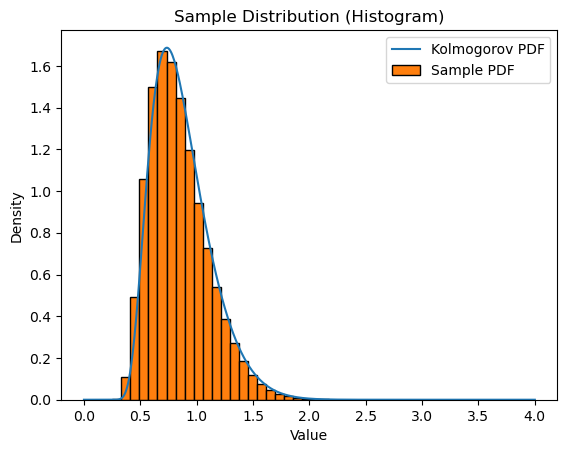

In [63]:
plt.plot(x, y_pdf, label=f"Kolmogorov PDF")
plt.hist(max_abs_B, bins=30, density=True, edgecolor='black',label = 'Sample PDF')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Sample Distribution (Histogram)")
plt.legend()
plt.show()

## Brownian Excursions

A Brownian excursion $E_t$, is a continuous-time stochastic process that describes Brownian motion (a random walk) conditioned to be positive and to return to a specific point at a fixed time, usually to 0. One way to generate brownian excursions is using the Vervatt Transformation.

### The Vervaat Transformation

Let $B = \{B_t : 0 \leq t \leq 1\}$ be a standard Brownian bridge with $B_0 = B_1 = 0$. The Vervaat transformation converts this Brownian bridge into a Brownian excursion through the following steps:

1. Let $\tau = \arg\min_{t \in [0,1]} B_t$ be the time at which the Brownian bridge attains its minimum value.

2. Define the Vervaat transform $V(B)$ of the Brownian bridge as:

$$V(B)_t = \begin{cases}
B_{\tau + t} - B_{\tau} & \text{if } \tau + t \leq 1 \\
B_{\tau + t - 1} - B_{\tau} & \text{if } \tau + t > 1
\end{cases}$$

for $t \in [0,1]$.

*Properties*

1. $V(B)_0 = V(B)_1 = 0$
2. $V(B)_t > 0$ for all $t \in (0,1)$
3. The process $V(B)$ is a Brownian excursion

*Intuitive Explanation*

The Vervaat transformation can be understood as:

1. Finding the minimum point of the Brownian bridge
2. Cutting the bridge at this minimum point
3. Shifting the entire path so that the minimum value becomes 0
4. Rearranging the path to start from the minimum point, wrapping around to form a new path

*Theorem*

If $B$ is a standard Brownian bridge, then $V(B)$ has the same distribution as a standard Brownian excursion.

$$V(B) \stackrel{d}{=} \{e_t : 0 \leq t \leq 1\}$$

where $\{e_t : 0 \leq t \leq 1\}$ denotes a standard Brownian excursion.

*Implementation in Terms of Path Transformation*

For a discretized Brownian bridge $\{B_{t_i}\}_{i=0}^n$ with $t_i = \frac{i}{n}$, let $k$ be the index such that $B_{t_k} = \min_{i} B_{t_i}$. Then the Vervaat transform is:

$$V(B)_{t_i} = \begin{cases}
B_{t_{k+i}} - B_{t_k} & \text{if } k+i \leq n \\
B_{t_{k+i-n}} - B_{t_k} & \text{if } k+i > n
\end{cases}$$

for $i = 0, 1, \ldots, n$.

In [86]:
def brownian_excursion_vervaat(bridge):
    
    excursions = np.zeros_like(bridge)
    n_paths, n_points = bridge.shape
    for i in range(n_paths):
        
        path = bridge[i]
        min_idx = np.argmin(path)
        
        # Edge case: if minimum is at endpoint, find the minimum excluding endpoints
        if min_idx == 0 or min_idx == n_points - 1:
            interior_min_idx = np.argmin(path[1:-1]) + 1
            min_idx = interior_min_idx
            
        # First part: from min_idx to end
        first_part = path[min_idx:] - path[min_idx]
        # Second part: from beginning to min_idx (excluding the first point)
        second_part = path[:min_idx] - path[min_idx]
        
        # Concatenate the parts
        excursion = np.concatenate([first_part, second_part])
        excursions[i] = excursion
        
    return excursions

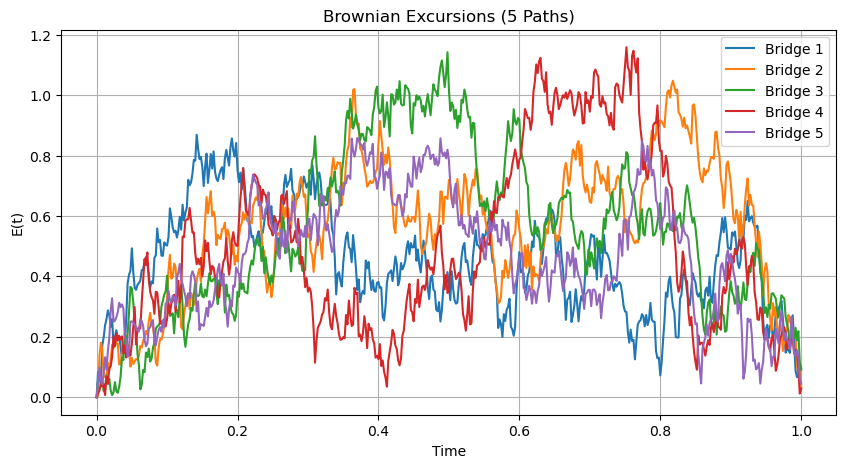

In [87]:
t,W = simulate_brownian(seed = 101)
E = brownian_excursion_vervaat(brownian_bridge_from_W(W, 1))

# --- Plot ---
plt.figure(figsize=(10, 5))
for i in range(M):
    plt.plot(t, E[i], label=f'Bridge {i+1}')

plt.title("Brownian Excursions (5 Paths)")
plt.xlabel("Time")
plt.ylabel("E(t)")
plt.grid(True)
plt.legend()
plt.show()

## Brownian Meander

A Brownian meander $M_t$ is a variant of Brownian motion conditioned to stay strictly positive over a fixed interval, usually [0,1], but without conditioning on its final value at time 1. As the name suggests, it is a piece of a Brownian path that "meanders" away from its starting point without crossing back below it.

$M_t = W_t |  \{W_s > 0 \text{ for all } s \leq 1\} $, where $\{W_t\}_{t \ge 0}$ is a standard brownian motion. We can derived it from a standard Brownian motion by conditioning it to be non-negative.

Let $ W = \{W_t,\, t \ge 0\} $ be a standard one-dimensional Brownian motion, and define

$\tau := \sup\{\, t \in [0,1] : W_t = 0 \,\}$, the last time before $ t = 1 $ when $ W $ visits the set $ \{0\} $.  

The **Brownian meander** is the process defined by

$
M_t
:= \frac{1}{\sqrt{1 - \tau}}
\left| W_{\tau + t (1 - \tau)} \right|,
\qquad t \in [0,1].
$

### Manual Brownian Meander
We will first use a manual brownian meander to show that $M_1$ ~ $R(\sigma = 1)$ using monte carlo.

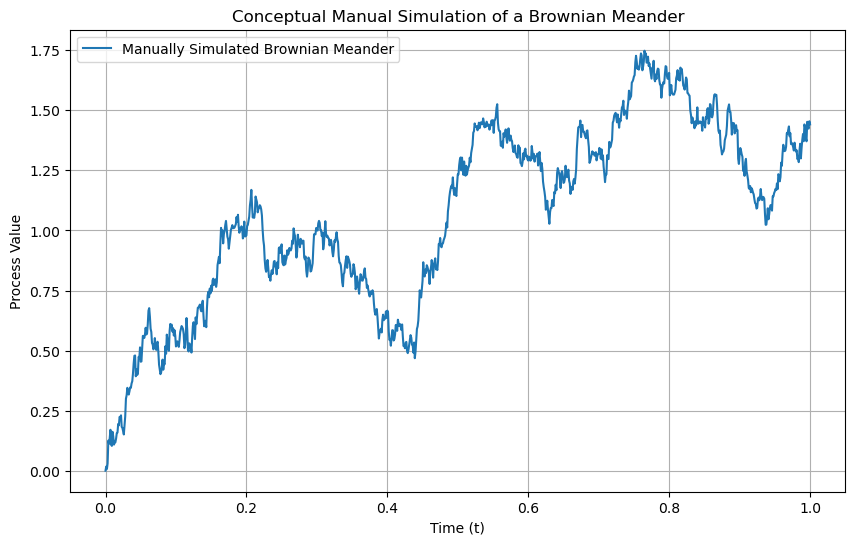

In [77]:
def brownian_meander_manual(T, N):
    """
    Generates a Brownian meander path manually.
    
    A simple (though inefficient for large N) way is to simulate a Brownian Motion 
    until it stays non-negative up to time T. The professional libraries 
    use more efficient mathematical methods. This function below is conceptual.
    """
    dt = T / N
    # This loop is inefficient for finding a valid path, 
    # the aleatory library's method is the correct implementation.
    while True:
        # Generate standard Brownian motion increments
        dW = np.random.standard_normal(size=N) * np.sqrt(dt)
        # Cumulative sum to get the path
        W = np.cumsum(dW)
        # Start at 0
        W = np.insert(W, 0, 0.)
        
        # Check if the entire path is non-negative
        if np.all(W >= 0):
            return W

# Parameters
T = 1.0  # Total time
N = 1000 # Number of steps

# Generate the meander path
path = brownian_meander_manual(T, N)
times = np.linspace(0, T, N + 1)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(times, path, label='Manually Simulated Brownian Meander')
plt.xlabel('Time (t)')
plt.ylabel('Process Value')
plt.title('Conceptual Manual Simulation of a Brownian Meander')
plt.grid(True)
plt.legend()
plt.show()

In [78]:
testing = []
for i in range(50000):
    path = brownian_meander_manual(T, N)
    testing.append(path[-1])

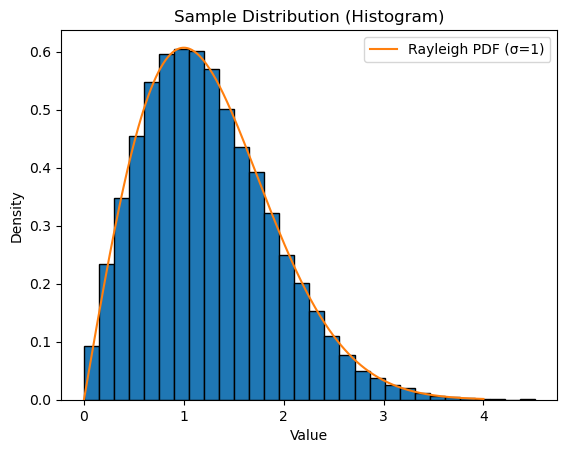

In [79]:
sigma = 1
rayleigh_pdf = (x / sigma**2) * np.exp(-(x**2) / (2 * sigma**2))

plt.hist(testing, bins=30, density=True, edgecolor='black')
plt.plot(x, rayleigh_pdf, label=f"Rayleigh PDF (σ={sigma})")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Sample Distribution (Histogram)")
plt.legend()
plt.show()